In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

from urllib.request import urlopen
from bs4 import BeautifulSoup

%matplotlib inline

In [26]:
# gather table from website - standard table
df = pd.read_html('https://www.foxsports.com/soccer/liverpool-team-stats')

In [27]:
type(df)

list

In [28]:
# Convert to pandas dataframe
df_standard=df[0]

In [29]:
# Confirm dataframe
type(df_standard)

pandas.core.frame.DataFrame

In [30]:
# import additional libraries for linear regression
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
# View dataframe
df_standard

,STANDARD,GP,GS,MP,G,A,SOG,S,YC,RC
0,"1 Salah, Mohamed Salah, M. M",27,27,2341,17,7,46,101,1,0
1,"2 Mane, Sadio Mane, S. F",28,28,2270,15,7,30,58,2,0
2,"3 Firmino, Roberto Firmino, R. F",31,31,2560,8,7,34,80,0,0
3,"4 van Dijk, Virgil van Dijk, V. D",31,31,2790,4,1,11,18,1,0
4,"5 Alexander-Arnold, Trent Alexander-Arnold, ...",31,31,2714,3,12,9,34,4,0
5,"5 Henderson, Jordan Henderson, J. M",27,27,2051,3,5,5,18,1,0
6,"5 Origi, Divock Origi, D. F",23,23,529,3,1,6,12,1,0
7,"5 Oxlade-Chamberlain, Alex Oxlade-Chamberlai...",23,23,1178,3,0,9,33,1,0
8,"5 Wijnaldum, Georginio Wijnaldum, G. M",30,30,2447,3,0,13,29,0,0
9,10 Fabinho Fabinho M,22,22,1625,2,2,4,9,5,0


,GP,GS,MP,G,A,SOG,S,YC,RC
GP,1.000000,1.000000,0.925353,0.532526,0.639118,0.575438,0.605217,0.370802,0.078452
GS,1.000000,1.000000,0.925353,0.532526,0.639118,0.575438,0.605217,0.370802,0.078452
MP,0.925353,0.925353,1.000000,0.533513,0.691477,0.594936,0.615443,0.276207,0.139736
G,0.532526,0.532526,0.533513,1.000000,0.567392,0.951359,0.913657,0.092686,-0.135044
A,0.639118,0.639118,0.691477,0.567392,1.000000,0.587080,0.650970,0.355295,-0.083932
SOG,0.575438,0.575438,0.594936,0.951359,0.587080,1.000000,0.983111,0.010484,-0.136310
S,0.605217,0.605217,0.615443,0.913657,0.650970,0.983111,1.000000,0.036904,-0.150843
YC,0.370802,0.370802,0.276207,0.092686,0.355295,0.010484,0.036904,1.000000,-0.173223
RC,0.078452,0.078452,0.139736,-0.135044,-0.083932,-0.136310,-0.150843,-0.173223,1.000000


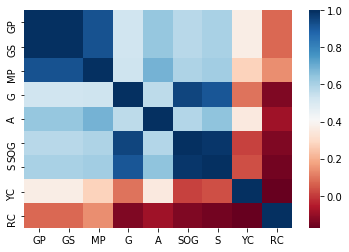

In [32]:
# explore dataframe to look for correlations
# calculate the correlation matrix
corr = df_standard.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')


In [9]:
# get second table from website - discipline table
df = pd.read_html('https://www.foxsports.com/soccer/liverpool-team-stats?competition=1&season=20190&category=DISCIPLINE')

In [24]:
# Convert to pandas dataframe
df_discipline=df[0]

In [25]:
# View dataframe
df_discipline

,CONTROL,GP,GS,MP,TT,P,INT,BLK,GMB,TKL,OFF,C,CK
0,1 Adrian Adrian G,11,11,873,-,160,0,-,-,2,0,0,0
1,"1 Alexander-Arnold, Trent Alexander-Arnold, ...",31,31,2714,-,1905,24,-,-,43,3,366,141
2,1 Alisson Alisson G,22,22,1929,-,480,1,-,-,0,0,0,0
3,"1 Elliott, Harvey Elliott, H. F",2,2,6,-,9,0,-,-,0,0,3,3
4,1 Fabinho Fabinho M,22,22,1625,-,1084,17,-,-,51,0,13,0
5,"1 Firmino, Roberto Firmino, R. F",31,31,2560,-,937,4,-,-,27,7,18,2
6,"1 Gomez, Joe Gomez, J. D",21,21,1413,-,1233,17,-,-,25,0,10,0
7,"1 Henderson, Jordan Henderson, J. M",27,27,2051,-,1420,15,-,-,47,0,74,0
8,"1 Jones, Curtis Jones, C. M",2,2,19,-,22,1,-,-,2,0,0,0
9,"1 Keita, Naby Keita, N. M",11,11,439,-,357,6,-,-,13,0,4,3


,GP,GS,MP,P,INT,TKL,OFF,C,CK
GP,1.000000,1.000000,0.925353,0.800048,0.630777,0.716015,0.443694,0.451536,0.307845
GS,1.000000,1.000000,0.925353,0.800048,0.630777,0.716015,0.443694,0.451536,0.307845
MP,0.925353,0.925353,1.000000,0.868095,0.666312,0.706842,0.475328,0.487541,0.361940
P,0.800048,0.800048,0.868095,1.000000,0.916981,0.809688,0.150566,0.566716,0.415716
INT,0.630777,0.630777,0.666312,0.916981,1.000000,0.860794,-0.061261,0.621251,0.439840
TKL,0.716015,0.716015,0.706842,0.809688,0.860794,1.000000,0.162652,0.553874,0.323304
OFF,0.443694,0.443694,0.475328,0.150566,-0.061261,0.162652,1.000000,0.198131,0.201512
C,0.451536,0.451536,0.487541,0.566716,0.621251,0.553874,0.198131,1.000000,0.919963
CK,0.307845,0.307845,0.361940,0.415716,0.439840,0.323304,0.201512,0.919963,1.000000


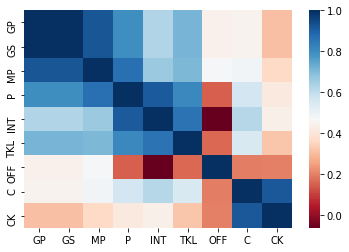

In [33]:
# explore dataframe to look for correlations
# calculate the correlation matrix
corr = df_discipline.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')



In [13]:
# get third table from website - control table
df = pd.read_html('https://www.foxsports.com/soccer/liverpool-team-stats?competition=1&season=20190&category=CONTROL')

In [14]:
# Convert to pandas dataframe
df_control=df[0]

In [15]:
# View dataframe
df_control

,CONTROL,GP,GS,MP,TT,P,INT,BLK,GMB,TKL,OFF,C,CK
0,1 Adrian Adrian G,11,11,873,-,160,0,-,-,2,0,0,0
1,"1 Alexander-Arnold, Trent Alexander-Arnold, ...",31,31,2714,-,1905,24,-,-,43,3,366,141
2,1 Alisson Alisson G,22,22,1929,-,480,1,-,-,0,0,0,0
3,"1 Elliott, Harvey Elliott, H. F",2,2,6,-,9,0,-,-,0,0,3,3
4,1 Fabinho Fabinho M,22,22,1625,-,1084,17,-,-,51,0,13,0
5,"1 Firmino, Roberto Firmino, R. F",31,31,2560,-,937,4,-,-,27,7,18,2
6,"1 Gomez, Joe Gomez, J. D",21,21,1413,-,1233,17,-,-,25,0,10,0
7,"1 Henderson, Jordan Henderson, J. M",27,27,2051,-,1420,15,-,-,47,0,74,0
8,"1 Jones, Curtis Jones, C. M",2,2,19,-,22,1,-,-,2,0,0,0
9,"1 Keita, Naby Keita, N. M",11,11,439,-,357,6,-,-,13,0,4,3


,GP,GS,MP,P,INT,TKL,OFF,C,CK
GP,1.000000,1.000000,0.925353,0.800048,0.630777,0.716015,0.443694,0.451536,0.307845
GS,1.000000,1.000000,0.925353,0.800048,0.630777,0.716015,0.443694,0.451536,0.307845
MP,0.925353,0.925353,1.000000,0.868095,0.666312,0.706842,0.475328,0.487541,0.361940
P,0.800048,0.800048,0.868095,1.000000,0.916981,0.809688,0.150566,0.566716,0.415716
INT,0.630777,0.630777,0.666312,0.916981,1.000000,0.860794,-0.061261,0.621251,0.439840
TKL,0.716015,0.716015,0.706842,0.809688,0.860794,1.000000,0.162652,0.553874,0.323304
OFF,0.443694,0.443694,0.475328,0.150566,-0.061261,0.162652,1.000000,0.198131,0.201512
C,0.451536,0.451536,0.487541,0.566716,0.621251,0.553874,0.198131,1.000000,0.919963
CK,0.307845,0.307845,0.361940,0.415716,0.439840,0.323304,0.201512,0.919963,1.000000


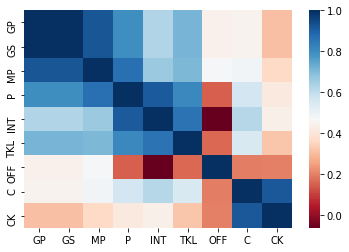

In [18]:
# explore dataframe to look for correlations
# calculate the correlation matrix
corr = df_control.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [19]:
# Merging dataframes 
# Importing necessary libraries
from IPython.display import display
from IPython.display import Image

In [44]:
# Merge standard and controle dataframes
df_merged = pd.merge(df_standard, df_control, how='inner')

,GP,GS,MP,G,A,SOG,S,YC,RC,P,INT,TKL,OFF,C,CK
GP,1.000000,1.000000,0.925353,0.532526,0.639118,0.575438,0.605217,0.370802,0.078452,0.800048,0.630777,0.716015,0.443694,0.451536,0.307845
GS,1.000000,1.000000,0.925353,0.532526,0.639118,0.575438,0.605217,0.370802,0.078452,0.800048,0.630777,0.716015,0.443694,0.451536,0.307845
MP,0.925353,0.925353,1.000000,0.533513,0.691477,0.594936,0.615443,0.276207,0.139736,0.868095,0.666312,0.706842,0.475328,0.487541,0.361940
G,0.532526,0.532526,0.533513,1.000000,0.567392,0.951359,0.913657,0.092686,-0.135044,0.225309,0.002838,0.280639,0.950977,0.142990,0.113710
A,0.639118,0.639118,0.691477,0.567392,1.000000,0.587080,0.650970,0.355295,-0.083932,0.590826,0.504989,0.648245,0.583955,0.817948,0.690245
SOG,0.575438,0.575438,0.594936,0.951359,0.587080,1.000000,0.983111,0.010484,-0.136310,0.267815,0.009853,0.259977,0.951921,0.148415,0.135265
S,0.605217,0.605217,0.615443,0.913657,0.650970,0.983111,1.000000,0.036904,-0.150843,0.298561,0.062522,0.305975,0.942774,0.259553,0.236766
YC,0.370802,0.370802,0.276207,0.092686,0.355295,0.010484,0.036904,1.000000,-0.173223,0.409349,0.529241,0.560454,0.040429,0.420342,0.416910
RC,0.078452,0.078452,0.139736,-0.135044,-0.083932,-0.136310,-0.150843,-0.173223,1.000000,-0.076626,-0.181978,-0.235819,-0.105324,-0.097869,-0.061221
P,0.800048,0.800048,0.868095,0.225309,0.590826,0.267815,0.298561,0.409349,-0.076626,1.000000,0.916981,0.809688,0.150566,0.566716,0.415716


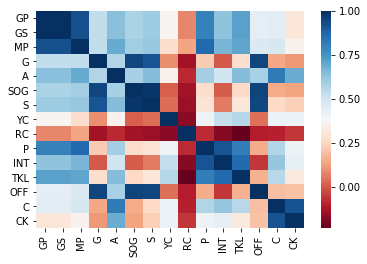

In [45]:
# explore merged dataframe to look for correlations among all stats
# calculate the correlation matrix
corr = df_merged.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

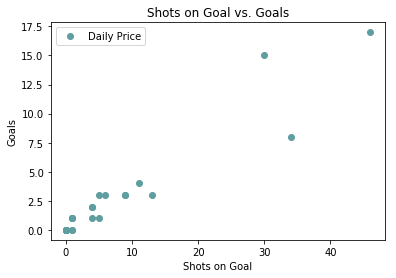

In [46]:
# Build a scatter plot showing the relationship between "Shots on Goal (SOG)" and "Goals (G)"

# define the x & y data.
x = df_standard['SOG']
y = df_standard['G']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'Daily Price')

# make sure it's formatted.
plt.title("Shots on Goal vs. Goals")
plt.xlabel("Shots on Goal")
plt.ylabel("Goals")
plt.legend()

plt.show()


In [61]:
# Drop unnecessary columns
df1 = df_standard.drop('STANDARD', axis=1)
df2 = df1.drop('GP', axis=1)
df3 = df2.drop('GS', axis=1)
df5 = df3.drop('A', axis=1)
df6 = df5.drop('S', axis=1)
df7 = df6.drop('MP', axis=1)
df8 = df7.drop('YC', axis=1)
df9 = df8.drop('RC', axis=1)

In [62]:
df9

,G,SOG
0,17,46
1,15,30
2,8,34
3,4,11
4,3,9
5,3,5
6,3,6
7,3,9
8,3,13
9,2,4


In [72]:
# Build Linear Regression Model
# define input variable (X) & output variable.
Y = df9.drop('SOG', axis = 1)
X = df9[['SOG']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [73]:
# create object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
# Determine the coefficient of model and intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.35
The intercept for our model is 0.1439


In [75]:
# test a prediction
prediction = regression_model.predict([[20.00]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 7.202


In [76]:
# Get multiple predictions.
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[0.49679985],
       [0.1439135 ],
       [4.02566333],
       [1.90834524],
       [0.1439135 ]])

In [77]:
# Evaluating the model

# define the input
X2 = sm.add_constant(X)

# create an OLS model.
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
# make some confidence intervals, 95% by default.
est.conf_int()

,0,1
const,-0.599420,0.824526
SOG,0.302427,0.403505


In [79]:
# Fitting the model

# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))


MSE 0.18
MAE 0.329
RMSE 0.424


In [80]:
# RSquared
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.91


In [81]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     209.8
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           9.92e-13
Time:                        14:41:05   Log-Likelihood:                -41.218
No. Observations:                  24   AIC:                             86.44
Df Residuals:                      22   BIC:                             88.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1126      0.343      0.328      0.7

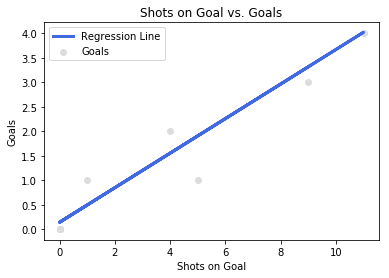

Shots on Goal:0.35
Mean squared error: 0.1801
Root Mean squared error: 0.4244
R2 score: 0.91


In [84]:
# Plotting Linear Regression Model
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Goals')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Shots on Goal vs. Goals")
plt.xlabel("Shots on Goal")
plt.ylabel("Goals")
plt.legend()
plt.show()

# The coefficients
print('Shots on Goal:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))
